In [8]:
from numpy.core.fromnumeric import amin
import pandas as pd
from read_input import read_pdbs
import itertools
from itertools import product, combinations


native_pdb, fibril_pdb = read_pdbs()

# Make a dictionary from the pdb of resnum:resid from the pdb structure
pdb_resids = native_pdb.residues.resids.tolist()
amino_dict = dict(zip(pdb_resids,(list(native_pdb.residues.resnames))))

# Same dictionary but also with number and names
pdb_resid_name = native_pdb.residues.resnames + '_' + native_pdb.residues.resids.astype(str)
amino_dict_num = dict(zip(pdb_resids,pdb_resid_name))
#print(amino_dict)
#print(amino_dict_num)

# Create the DataFrame of the pairs list
pairs_list = pd.read_csv('GRETA/output_TTR/pairs_list_c5_ex3.txt', sep='\\s+')

pairs_list.insert(1, 'ai_resnumber', '')
pairs_list.insert(1, 'ai_resname', '')
pairs_list.insert(4, 'aj_resnumber', '')
pairs_list.insert(4, 'aj_resname', '')

# Separation of the atomtype and the aminoacid number. 
# The atomtype column will be replaced avoiding to create a column and delete this one.
pairs_list[['ai_resname', 'ai_resnumber']] = pairs_list.ai.str.split("_", expand = True)
pairs_list[['aj_resname', 'aj_resnumber']] = pairs_list.aj.str.split("_", expand = True)
# Replacing the atomtype values with aminoacid number as int
pairs_list['ai_resname'] = pairs_list['ai_resnumber'].astype(int)
pairs_list['aj_resname'] = pairs_list['aj_resnumber'].astype(int)
# Conversion from str to int
pairs_list['ai_resnumber'] = pairs_list['ai_resnumber'].astype(int)
pairs_list['aj_resnumber'] = pairs_list['aj_resnumber'].astype(int)
# Replacing the aminoacid number with the aminoacid name
pairs_list['ai_resname'] = pairs_list.ai_resname.map(amino_dict)
pairs_list['aj_resname'] = pairs_list.aj_resname.map(amino_dict)

print(pairs_list)#.to_string())


       ai ai_resname  ai_resnumber      aj aj_resname  aj_resnumber  type  \
0    CA_1        TYR             1    CA_1        TYR             1     1   
1    CA_1        TYR             1    CB_1        TYR             1     1   
2    CA_1        TYR             1   CB_11        SER            11     1   
3    CA_1        TYR             1   CD1_1        TYR             1     1   
4    CA_1        TYR             1  CE2_10        TYR            10     1   
..    ...        ...           ...     ...        ...           ...   ...   
687   O_7        LEU             7     O_7        LEU             7     1   
688   O_7        LEU             7     O_8        SER             8     1   
689   O_8        SER             8     O_8        SER             8     1   
690   O_8        SER             8     O_9        PRO             9     1   
691   O_9        PRO             9     O_9        PRO             9     1   

      c6  c12  sigma  epsilon  
0   0.01 0.00   0.42     0.26  
1   0.01 0.

In [9]:
contacts_histogram = {}
for an in pdb_resids:
    # pdb_resids is the aminocid numbers
    # Selection of the rows contaning the aminoacid number of interest.
    # Note the | and not the &
    is_an = (pairs_list['ai_resnumber'] == an) | (pairs_list['aj_resnumber'] == an)

    # Filtering a dataframe containing only the aminoacid selected.
    pairs_an = pairs_list[is_an]

    print(f'Total amount of contacts made by {amino_dict_num.get(an)}:', len(pairs_an))
    #print(pairs_an)
    pairs_an.loc[pairs_an['ai_resnumber'] == an, 'an_with_who'] = pairs_an['aj_resname'] + '_' + pairs_an['aj_resnumber'].astype(str)
    pairs_an.loc[pairs_an['ai_resnumber'] != an, 'an_with_who'] = pairs_an['ai_resname'] + '_' + pairs_an['ai_resnumber'].astype(str)

    print(pairs_an.to_string())
    an_with_who = pairs_an.an_with_who.value_counts()
    contacts_histogram['{0}'.format(an)] = an_with_who.to_dict()
    print(an_with_who.to_string())

#print(contacts_histogram)

Total amount of contacts made by TYR_1: 165
         ai ai_resname  ai_resnumber      aj aj_resname  aj_resnumber  type   c6  c12  sigma  epsilon an_with_who
0      CA_1        TYR             1    CA_1        TYR             1     1 0.01 0.00   0.42     0.26       TYR_1
1      CA_1        TYR             1    CB_1        TYR             1     1 0.01 0.00   0.43     0.26       TYR_1
2      CA_1        TYR             1   CB_11        SER            11     1 0.01 0.00   0.42     0.26      SER_11
3      CA_1        TYR             1   CD1_1        TYR             1     1 0.00 0.00   0.38     0.26       TYR_1
4      CA_1        TYR             1  CE2_10        TYR            10     1 0.00 0.00   0.40     0.26      TYR_10
5      CA_1        TYR             1    CG_1        TYR             1     1 0.01 0.00   0.44     0.26       TYR_1
6      CA_1        TYR             1   CZ_10        TYR            10     1 0.01 0.00   0.44     0.26      TYR_10
7      CA_1        TYR             1     C_1

In [10]:
# Dataframe preparation

histo_df = pd.DataFrame(contacts_histogram)
histo_df[''] = histo_df.index.astype(str)
histo_df[''] = histo_df[''].str.split('_').str[1].astype(int)
histo_df.sort_values(by = [''], inplace = True)
histo_df.drop(columns='', inplace=True)
histo_df = histo_df.fillna(0)
histo_df.columns = list(amino_dict_num.values())
print(histo_df.to_string())



        TYR_1  THR_2  ILE_3  ALA_4  ALA_5  LEU_6  LEU_7  SER_8  PRO_9  TYR_10  SER_11
TYR_1   55.00  21.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   35.00   54.00
THR_2   21.00  23.00  10.00   0.00   0.00   0.00   0.00   0.00  10.00   20.00   12.00
ILE_3    0.00  10.00  26.00  18.00   1.00   0.00   0.00  12.00   9.00   15.00    0.00
ALA_4    0.00   0.00  18.00  15.00   7.00   0.00  11.00   0.00   9.00    0.00    0.00
ALA_5    0.00   0.00   1.00   7.00  14.00  16.00   6.00   0.00   0.00    0.00    0.00
LEU_6    0.00   0.00   0.00   0.00  16.00  33.00  31.00   1.00   0.00    0.00    3.00
LEU_7    0.00   0.00   0.00  11.00   6.00  31.00  28.00   7.00   2.00    0.00    2.00
SER_8    0.00   0.00  12.00   0.00   0.00   1.00   7.00  19.00  14.00    3.00   25.00
PRO_9    0.00  10.00   9.00   9.00   0.00   0.00   2.00  14.00  23.00   14.00    0.00
TYR_10  35.00  20.00  15.00   0.00   0.00   0.00   0.00   3.00  14.00   54.00   12.00
SER_11  54.00  12.00   0.00   0.00   0.00   3.00   2.0

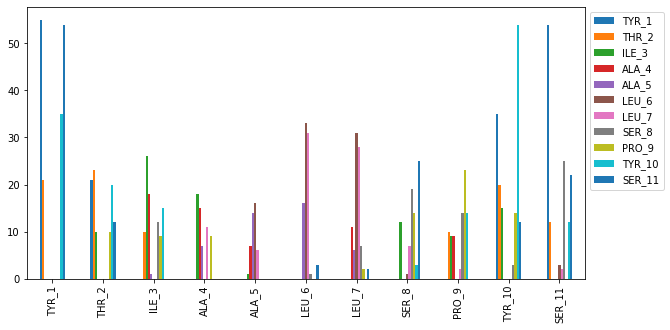

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.colors import ListedColormap

histo_df.plot(kind = "bar", stacked = False, figsize = (10,5))
plt.legend(loc = 'upper right', bbox_to_anchor = (1.15, 1))
plt.show()

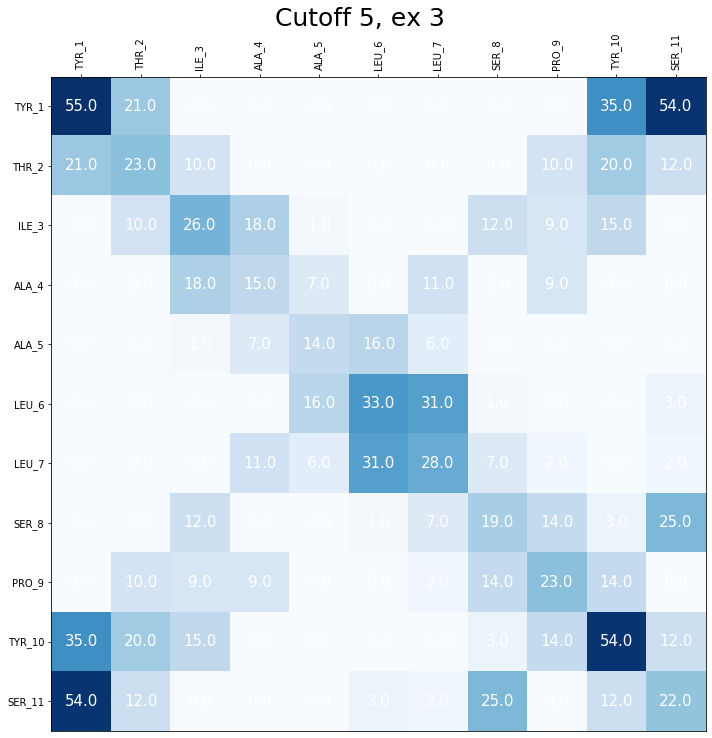

In [12]:
import numpy as np

matrix_df = histo_df.to_numpy()
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(matrix_df, interpolation='nearest', cmap = 'Blues')
# Setting length of the axes to show all the labels 
ax.set_xticks(np.arange(len(histo_df.columns)))
ax.set_yticks(np.arange(len(histo_df.index)))
# Naming all the axis values
ax.set_xticklabels(list(histo_df.columns))
ax.set_yticklabels(list(histo_df.index))
# Rotate x labels
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 90, ha='center', rotation_mode='default')

# Loop over data dimensions and create tet annotations
for i in range(len(histo_df.index)):
    for j in range(len(histo_df.columns)):
        text = ax.text(j,i, matrix_df[i,j], ha='center', va='center', color='w', fontsize = 15)
plt.suptitle('Cutoff 5, ex 3', fontsize = 25, y = 1.02)
fig.tight_layout()

In [13]:
# Making a normalized dataframe and matrix
histo_df_norm = histo_df.div(histo_df.max().max())
pd.options.display.float_format = '{:.2f}'.format
print(histo_df_norm.to_string())

        TYR_1  THR_2  ILE_3  ALA_4  ALA_5  LEU_6  LEU_7  SER_8  PRO_9  TYR_10  SER_11
TYR_1    1.00   0.38   0.00   0.00   0.00   0.00   0.00   0.00   0.00    0.64    0.98
THR_2    0.38   0.42   0.18   0.00   0.00   0.00   0.00   0.00   0.18    0.36    0.22
ILE_3    0.00   0.18   0.47   0.33   0.02   0.00   0.00   0.22   0.16    0.27    0.00
ALA_4    0.00   0.00   0.33   0.27   0.13   0.00   0.20   0.00   0.16    0.00    0.00
ALA_5    0.00   0.00   0.02   0.13   0.25   0.29   0.11   0.00   0.00    0.00    0.00
LEU_6    0.00   0.00   0.00   0.00   0.29   0.60   0.56   0.02   0.00    0.00    0.05
LEU_7    0.00   0.00   0.00   0.20   0.11   0.56   0.51   0.13   0.04    0.00    0.04
SER_8    0.00   0.00   0.22   0.00   0.00   0.02   0.13   0.35   0.25    0.05    0.45
PRO_9    0.00   0.18   0.16   0.16   0.00   0.00   0.04   0.25   0.42    0.25    0.00
TYR_10   0.64   0.36   0.27   0.00   0.00   0.00   0.00   0.05   0.25    0.98    0.22
SER_11   0.98   0.22   0.00   0.00   0.00   0.05   0.0

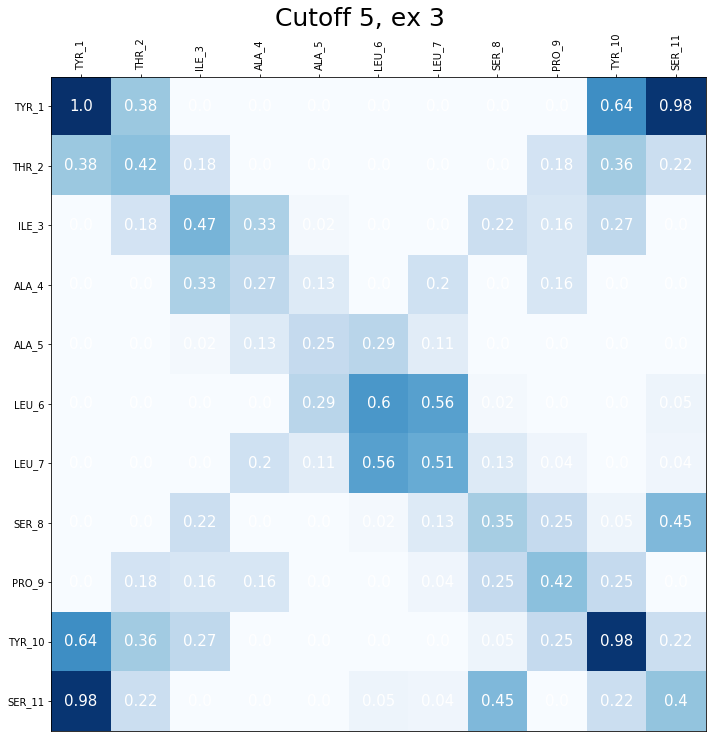

In [14]:
matrix_norm_df = histo_df_norm.to_numpy()
matrix_norm_df = matrix_norm_df.round(decimals = 2)

# plot creation
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(matrix_norm_df, interpolation='nearest', cmap = 'Blues')
# Setting length of the axes to show all the labels 
ax.set_xticks(np.arange(len(histo_df_norm.columns)))
ax.set_yticks(np.arange(len(histo_df_norm.index)))
# Naming all the axis values
ax.set_xticklabels(list(histo_df_norm.columns))
ax.set_yticklabels(list(histo_df_norm.index))
# Rotate x labels
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 90, ha='center', rotation_mode='default')

# Loop over data dimensions and create tet annotations
for i in range(len(histo_df_norm.index)):
    for j in range(len(histo_df_norm.columns)):
        text = ax.text(j,i, matrix_norm_df[i,j], ha='center', va='center', color='w', fontsize = 15)
plt.suptitle('Cutoff 5, ex 3', fontsize = 25, y = 1.02)
fig.tight_layout()